# Project 1: Pokémon 
 


# Data Analysis 

- [x] **Libraries we might need to install**

In [ ]:
# Run these directly in a cell

#!pip install tensorflow
#!pip install missingno
#!pip install seaborn
#!pip install numpy
#!pip install pandas
#!pip install matplotlib

- [x] **Tips for rearranging your Notebook**

- Hold ctrl+shift and click on the various cells you want to move, then press the arrow keys to move them up or down.

## 1. Visualize the data

- [x] **View the data**

In [6]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("pokemon_data.csv")

df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- [x] **Work with the data in chunks**

In [162]:
for df in pd.read_csv('pokemon_data.csv', chunksize=5):     # 5 rows at a time
    print(df)

   #                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False  
   #                       Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
5  5                 Charmeleon   Fire     NaN  58      64       58       80   
6  6                  Charizard   Fire  Flying  78      84       78      109   
7  6  CharizardMega Charizard X   Fire  Drago

- [x] **Count Occurrences**

In [245]:
df["Generation"].value_counts()
df["Type 1"].value_counts()
df["Type 2"].value_counts()             # the amount of times each type appears in 'Type 2'
df["Legendary"].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

- [x] **Check data types**

In [179]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

## 2. Reorganizing and Cleaning the Data

- [x] **Rearranje and Rename Columns**

In [270]:
df = pd.read_csv("pokemon_data.csv")

df["Name 2"] = df["Name"]          # Get a new column which is a copy of the column name

new_order = [df.columns[0]] + [df.columns[-1]] + list(df.columns[1:-1])

df_no = df[new_order]

df_no


,#,Name 2,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- [x] **Drop Columns that are Unnecessary**

In [273]:
df_no.drop("Name 2", axis=1, inplace=True)  

# df = df.drop(columns=["Name 2"])  also works

df_no

C:\Users\micro\AppData\Local\Temp\ipykernel_8812\3629617472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no.drop("Name 2", axis=1, inplace=True)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- [x] **Fix all of the inconsistencies in the "Name" column (Mega, Forme, Mode, Wormadam, Rotom, Hoopa, Primal, and Kyurem)**

In [22]:
# In pokemon, they're really called "forme", but let's assume this is in fact a mistake

df = pd.read_csv("pokemon_data.csv")

df.loc[df["Name"].str.contains('Mega')]   # searches for all of the Megas

df["Name"] = df["Name"].str.replace(r"(\w+)(Mega \w+)", r"\2", regex=True)  

df

# Let's check the Hoopa

df.loc[df["Name"].str.contains("Hoopa")]

df["Name"]=df["Name"].str.replace(r"(\w+)(Hoopa \w+)", r"\2", regex=True)

df.loc[df["Name"].str.contains("Hoopa")]

# Now, let's check Shaymin  (this is a part of forme, but leave it here as an extra example)

df.loc[df["Name"].str.contains("Shaymin")]

df["Name"] = df["Name"].str.replace(r"(?i)(\bShaymin)(Land|Sky)\s*Forme", r"\1 (\2 Form)", regex=True)

df.loc[df["Name"].str.contains("Shaymin")]

# Let's check all the "formes"

df.loc[df["Name"].str.contains("Forme")]

df["Name"] = df["Name"].str.replace(
    r"(?i)(\b[A-Za-z]+)(Normal|Attack|Defense|Speed|Altered|Origin|Incarnate|Therian|Primal|Ash|Ordinary|Resolute|Aria|Pirouette|Blade|Shield|50%)\s*Forme",
    r"\1 (\2 Form)",
    regex=True
)



df.loc[df["Name"].str.contains("Form")]


# Now we search for the "Primal"

df.loc[df["Name"].str.contains("Primal")]

df["Name"] = df["Name"].str.replace(r"(\w+)(Primal \w+)", r"\2", regex=True)  

df.loc[df["Name"].str.contains("Primal")]

# Now, let's check "Mode"

df.loc[df["Name"].str.contains("Mode")]

df["Name"] = df["Name"].str.replace(r"(?i)(\bDarmanitan)(Standard|Zen)\s*Mode", r"\1 (\2 Mode)", regex=True)

df.loc[df["Name"].str.contains("Mode")]

# Now, let's check "Wormadam"

df.loc[df["Name"].str.contains("Wormadam")]

df["Name"] = df["Name"].str.replace(r"(?i)(\bWormadam)(Plant|Sandy|Trash)\s*Cloak", r"\1 (\2 Mode)", regex=True)

df.loc[df["Name"].str.contains("Wormadam")]

# Now, for Rotom

df.loc[df["Name"].str.contains("Rotom")]

df["Name"] = df["Name"].str.replace(r"(\w+)((Heat|Wash|Frost|Fan|Mow) \w+)", r"\2", regex=True)  

df.loc[df["Name"].str.contains("Rotom")]

# And finally, Kyurem

df.loc[df["Name"].str.contains("Kyurem")]

df["Name"] = df["Name"].str.replace(r"(\w+)((Black|White) \w+)", r"\2", regex=True)

df.loc[df["Name"].str.contains("Kyurem")]


# Use this for general cleaning: (works for various cases)

#df["Name"] = df["Name"].str.replace(
#    r"(?i)(?:mega\s*)?(\w+)\s*mega\s*(\w*)", r"Mega \1 \2", regex=True
#).str.replace(r"\s+", " ").str.strip()  # Ensures clean spacing

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
458,413,Wormadam (Plant Mode),Bug,Grass,60,59,85,79,105,36,4,False
459,413,Wormadam (Sandy Mode),Bug,Ground,60,79,105,59,85,36,4,False
460,413,Wormadam (Trash Mode),Bug,Steel,60,69,95,69,95,36,4,False


- [x] **Search for names that may have more than two words and clean them if necessary**

In [107]:
df[df["Name"].str.count(r"\s+") >= 2]  # Filters names with 2+ spaces (3+ words)

# They have all been fixed

df = pd.read_csv("pokemon_data.csv")

df.tail(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


- [x] **Add Zygarde (Complete Form) and Zygarde (10%) with the correct values (research in Pokemon Database website) and in the correct index position in the dataframe (10% form should come before the 50% form, and the complete form should go after the 50% form)**

In [230]:
# ChatGPT didn't do this one correctly

df.loc[df["Name"].str.contains("Zygarde")]

new_row_1 =[718, "Zygarde (10% Form)", "Dragon", "Ground", 54, 100, 71, 61, 85, 115, 6, True]
new_row_2 =[718, "Zygarde (Complete Form)", "Dragon", "Ground", 216, 100, 121, 91, 95, 85, 6, True]

df_zygardes = df.copy()
df_zygardes.loc[793.5] = new_row_1
df_zygardes = df_zygardes.sort_index().reset_index(drop=True)
df_zygardes.loc[795.5] = new_row_2
df_zygardes = df_zygardes.sort_index().reset_index(drop = True)

df_zygardes.tail(10)



,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
792,716,Xerneas,Fairy,NaN,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True
794,718,Zygarde (10% Form),Dragon,Ground,54,100,71,61,85,115,6,True
795,718,Zygarde (50% Form),Dragon,Ground,108,100,121,81,95,95,6,True
796,718,Zygarde (Complete Form),Dragon,Ground,216,100,121,91,95,85,6,True
797,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
798,719,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
799,720,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
800,720,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
801,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


- [x] **Delete rows with repeated names (Remove duplicate rows and keep the ones that have the highest BST if there are many with the same name but different BSTs)**

In [148]:
# These rows don't exist, but if they did, we'd do this:

df["BST"] = df.iloc[:,4:10].sum(axis=1)

df = df.drop_duplicates(subset="Name", keep="first")   # Keep the first instance of a name and delete all others

df = df.loc[df.groupby("Name")["BST"].idxmax()]  # Remove duplicates and keep the highest BST

- [x] **Save this new dataset (as clean_pokemon_data.csv)**

In [232]:
df_clean = df_zygardes

df_clean.to_csv("clean_pokemon_data.csv")

# It has now been saved

- [x] **Reopen the dataframe to see if everything is fine**

In [237]:
df = pd.read_csv("clean_pokemon_data.csv")

df

# Must remove this "Unnamed: 0" column, 
# This typically appears when you save or export a DataFrame with the index included, and pandas doesn't have a specific name for that column.

df = df.drop(columns=["Unnamed: 0"])

# df.to_csv("clean_pokemon_data.csv")

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
797,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
798,719,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
799,720,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
800,720,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- [x] **Change the Legendary column by allocating a 0 to "False" and a 1 to "True"**

In [8]:
# Here, the Legendary column has the Boolean values True and False,
# hence we can't state them as "True" and "False" in the dataframe (treated as a dictionary) 
# but True and False, without quotation marks

df["Legendary"] = df["Legendary"].map({True:1,False:0})

df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,1
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,1
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,1
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,1


## 3. Team Optimization & Selection

- [x] **Create a dataframe that only has the Pokemon and their respective Mega evolutions**

In [87]:
mega_df = df.loc[df["Name"].str.contains("Mega")]    # create a df with only megas

mega_df["Base name"] = mega_df["Name"].str.replace(r"^Mega\s*|\s*[XY]$", "", regex=True)  # Create a column with just their base name

# Now search for that base name in the original df and create a new one that has the rows of Pokemon that can Mega evolve

base_df = df[df["Name"].isin(mega_df["Base name"])]

# Now merge both

combined_df = pd.concat([base_df, mega_df], ignore_index=True)

combined_df["BST"] = combined_df.iloc[:,4:10].sum(axis=1)

# See to it that the base names appear before the megas

mega_candidates = combined_df.sort_values(by=["#","BST"], ascending = [True,True]).drop(columns="Base name")


mega_candidates

C:\Users\micro\AppData\Local\Temp\ipykernel_22092\1242304355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mega_df["Base name"] = mega_df["Name"].str.replace(r"^Mega\s*|\s*[XY]$", "", regex=True)  # Create a column with just their base name


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
0,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
46,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
1,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534
47,6,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
48,6,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,475,Mega Gallade,Psychic,Fighting,68,165,95,65,115,110,4,False,618
44,531,Audino,Normal,NaN,103,60,86,60,86,50,5,False,445
93,531,Mega Audino,Normal,Fairy,103,60,126,80,126,50,5,False,545
45,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600


- [x] **Find the best team per type using on BST as the metric.** (Teams can only have 6 Pokemon, no Legendaries)

In [91]:
# Define the BST column

df = pd.read_csv("clean_pokemon_data.csv")

df["BST"] = df["HP"] + df["Attack"] + df["Defense"]+df["Speed"] + df["Sp. Atk"] + df["Sp. Def"]

all_types = set(df["Type 1"].unique())   # this is a dictionary

Top_team_by_type = {}

for u_type in all_types:
    unique_type = df.loc[((df["Type 1"] == u_type) | (df["Type 2"] == u_type)) & (df["Legendary"] == False)]

    top_6 = unique_type.sort_values(by="BST", ascending = False).head(6).drop(columns="Unnamed: 0")

    Top_team_by_type[u_type] = top_6
   

Top_team_by_type["Fire"]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
7,6,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
8,6,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
279,257,Mega Blaziken,Fire,Fighting,80,160,80,130,80,100,3,False,630
248,229,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,2,False,600
354,323,Mega Camerupt,Fire,Ground,70,120,100,145,105,20,3,False,560
64,59,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False,555


In [33]:
# Another Solution, this one still returns the best ones but not in descending order

all_types = set(df["Type 1"].unique()) # this is a dictionary

Top_picks={}

for u_type in all_types:
    top_6 = df.loc[((df["Type 1"] == u_type) | (df["Type 2"] == u_type)) & (df["Legendary"] == False)].sort_values(by="BST", ascending = True).tail(6)
    Top_picks[u_type] = top_6

Top_picks["Bug"]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
520,469,Yanmega,Bug,Flying,86,76,86,116,56,95,4,False,515
698,637,Volcarona,Bug,Fire,85,60,65,135,105,100,5,False,550
232,214,HeracrossMega Heracross,Bug,Fighting,80,185,115,40,105,75,2,False,600
717,649,Genesect,Bug,Steel,71,120,95,120,95,99,5,False,600
137,127,PinsirMega Pinsir,Bug,Flying,65,155,120,65,90,105,1,False,600
229,212,ScizorMega Scizor,Bug,Steel,70,150,140,65,100,75,2,False,600


- [x]  **Find the best overall team across generations.**

In [14]:
# Now sort them by generation as well

df["BST"] = df["HP"] + df["Attack"] + df["Defense"]+df["Speed"] + df["Sp. Atk"] + df["Sp. Def"]

all_types = set(df["Type 1"].unique())

all_gens = set(df["Generation"].unique())

Top_6_by_gen = {}

for u_type in all_types:
    for gen in all_gens:
        top_6 = df.loc[((df["Type 1"] == u_type) | (df["Type 2"] == u_type)) & (df["Legendary"] == False) & (df["Generation"] == gen)].sort_values(by="BST", ascending= False).head(6)
        Top_6_by_gen[(u_type, gen)] = top_6

Top_6_by_gen["Fire",4]



,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
518,467,Magmortar,Fire,NaN,75,95,67,125,95,83,4,False,540
437,392,Infernape,Fire,Fighting,76,104,71,104,71,108,4,False,534
532,479,Heat Rotom,Electric,Fire,50,65,107,105,107,86,4,False,520
436,391,Monferno,Fire,Fighting,64,78,52,78,52,81,4,False,405
435,390,Chimchar,Fire,NaN,44,58,44,58,44,61,4,False,309


- [x] **Compare legendary vs non-legendary Pokémon in teams.**

In [37]:
# Create a for loop for legendaries as well

all_types = set(df["Type 1"].unique())

all_gens = set(df["Generation"].unique())

leg_status = set(df["Legendary"].unique())


Top = {}

for u_type in all_types:
    for gen in all_gens:
        for leg in leg_status:
            top_6 = df.loc[((df["Type 1"] == u_type) | (df["Type 2"] == u_type)) & (df["Generation"] == gen)
            & (df["Legendary"] == leg)].sort_values(by="BST", ascending=False).head(6)
            Top[(u_type,gen,leg)] = top_6

Top["Fire",4,True]

Top["Fire",4,False]

# By summing the BST, obviously the non-legendaries always win, we can ascertain this just by simple observation. 

# Let's sum the BST of all legendaries and non-legendaries and then compare. Learn dictionaries like chatGPT was doing.



,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
518,467,Magmortar,Fire,NaN,75,95,67,125,95,83,4,False,540
437,392,Infernape,Fire,Fighting,76,104,71,104,71,108,4,False,534
532,479,RotomHeat Rotom,Electric,Fire,50,65,107,105,107,86,4,False,520
436,391,Monferno,Fire,Fighting,64,78,52,78,52,81,4,False,405
435,390,Chimchar,Fire,NaN,44,58,44,58,44,61,4,False,309


- [x] **Identify the best mono-type and dual-type teams (also by generation and Legendary status)**.

In [39]:
# Mono-type teams

all_types = set(df["Type 1"].unique())      # dictionary with all types

all_gens = set(df["Generation"].unique())   # dictionary with all generations
 
leg_status = set(df["Legendary"].unique())  # dictionary with all Legendary statuses


Top_mono = {}


for u_type in all_types:
    for gen in all_gens:
        for leg in leg_status:
            top_6 = df.loc[((df["Type 1"] == u_type) & (df["Type 2"].isna()))
            & (df["Generation"] == gen) 
            & (df["Legendary"] == leg)].sort_values(by="BST", ascending=False).head(6)
            Top_mono[(u_type,gen,leg)] = top_6


Top_dual = {}    # chatGPT did a mistake here, yay I guess (23/02/2025)

for u_type in all_types:
    for gen in all_gens:
        for leg in leg_status:
            top_6 = df.loc[
                (((df["Type 1"] == u_type) & (df["Type 2"].notna())) |  # Type 1 matches u_type and Type 2 is not NaN
                ((df["Type 2"] == u_type) & (df["Type 1"].notna())))  # Type 2 matches u_type and Type 1 is not NaN
                & (df["Generation"] == gen) & (df["Legendary"] == leg)
            ].sort_values(by="BST", ascending=False).head(6)
            Top_dual[(u_type, gen, leg)] = top_6

Top_mono["Fire",4,False]

# Top_dual["Fire",4,False]



,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
518,467,Magmortar,Fire,NaN,75,95,67,125,95,83,4,False,540
435,390,Chimchar,Fire,NaN,44,58,44,58,44,61,4,False,309


## 4. Visualizations 


- [x] **Histogram:** Distribution of BST across all Pokémon. 

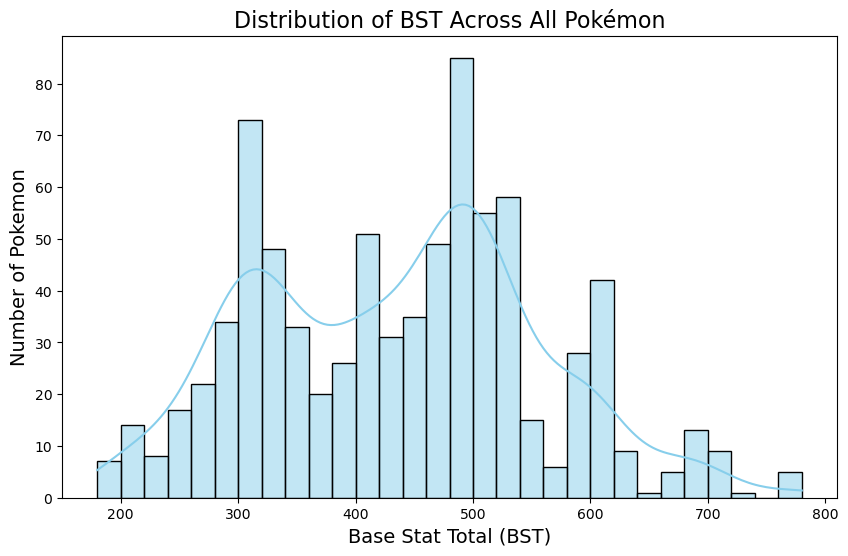

In [42]:
# This shows how many Pokemon have certain BSTs


plt.figure(figsize=(10, 6))

sns.histplot(df['BST'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of BST Across All Pokémon', fontsize=16)
plt.xlabel('Base Stat Total (BST)', fontsize=14)
plt.ylabel('Number of Pokemon', fontsize=14)

plt.show()

- [x] **Boxplot:** Compare BST across generations.

C:\Users\micro\AppData\Local\Temp\ipykernel_8812\2063447211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Generation', y='BST', data=df, palette='Set2')


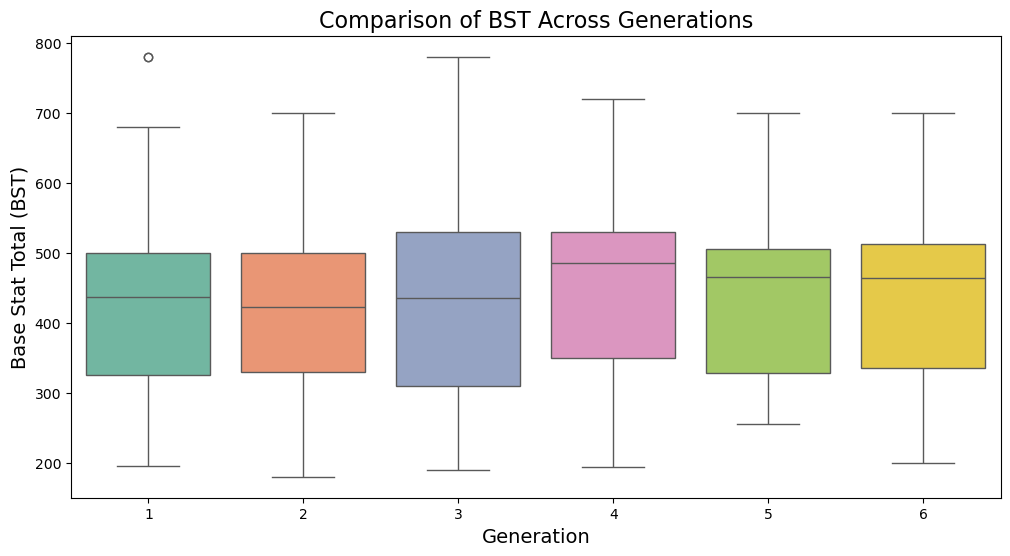

In [44]:
plt.figure(figsize=(12, 6))


sns.boxplot(x='Generation', y='BST', data=df, palette='Set2')


plt.title('Comparison of BST Across Generations', fontsize=16)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Base Stat Total (BST)', fontsize=14)


plt.show()

- [x] **Boxplot:** Compare BST for each Pokémon type.

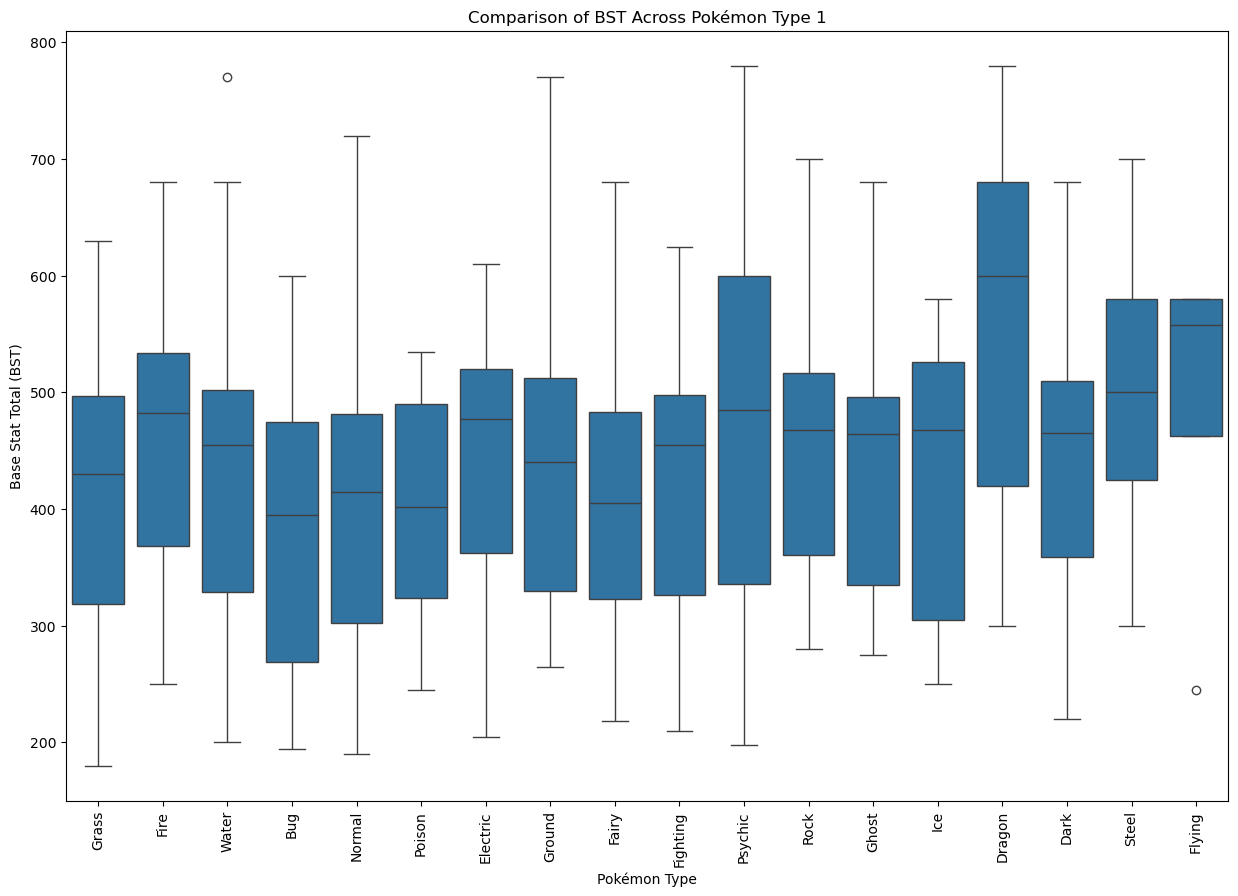

In [46]:
plt.figure(figsize=(15, 10))

sns.boxplot(x='Type 1', y='BST', data=df)

plt.xticks(rotation=90)

plt.title('Comparison of BST Across Pokémon Type 1')
plt.xlabel('Pokémon Type')
plt.ylabel('Base Stat Total (BST)')

plt.show()

- [x] **Pie Chart:** Proportion of each Pokémon type.

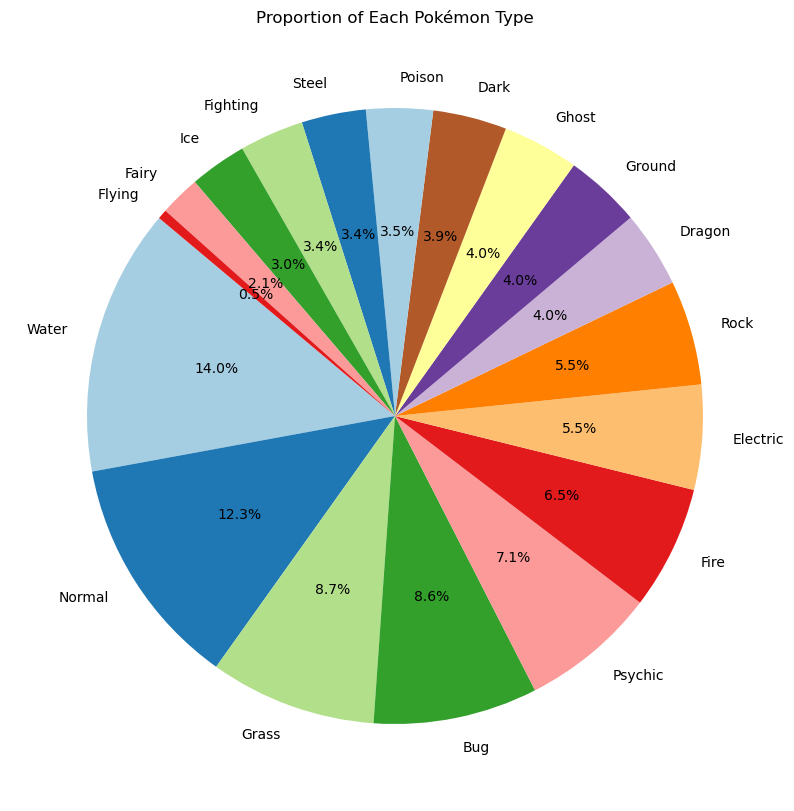

In [232]:
type_counts = df['Type 1'].value_counts()


plt.figure(figsize=(10, 10))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)


plt.title('Proportion of Each Pokémon Type')


plt.show()

- [x] **Pie Chart:** Proportion of each type 2, given a specific type 1.  

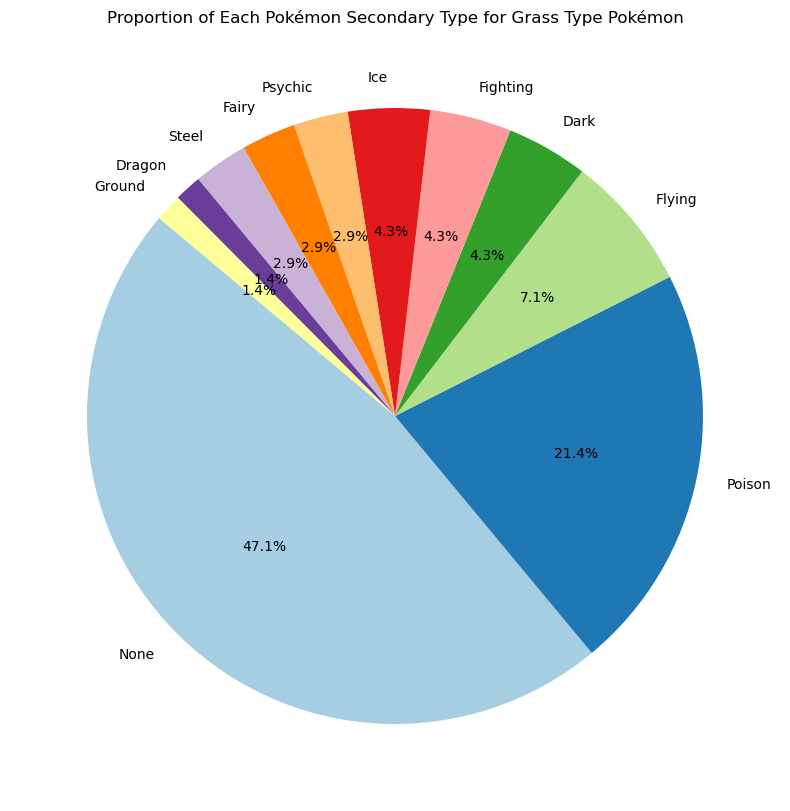

In [275]:
def plot_type2_distribution(df, type1):
    df_selected = df.loc[df["Type 1"] == type1]
    type_counts_selected = df_selected['Type 2'].fillna("None").value_counts()
    if type_counts_selected.empty:
        print(f"No Pokémon found with Type 1 = {type1}.")
        return
    plt.figure(figsize=(10, 10))
    plt.pie(type_counts_selected, labels=type_counts_selected.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Proportion of Each Pokémon Secondary Type for {type1} Type Pokémon')
    plt.show()

plot_type2_distribution(df, "Grass")

- [x] **Bar Chart:** Average BST per type.  

C:\Users\micro\AppData\Local\Temp\ipykernel_8812\1264691385.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_bst_per_type.index, y=avg_bst_per_type.values, palette='viridis')


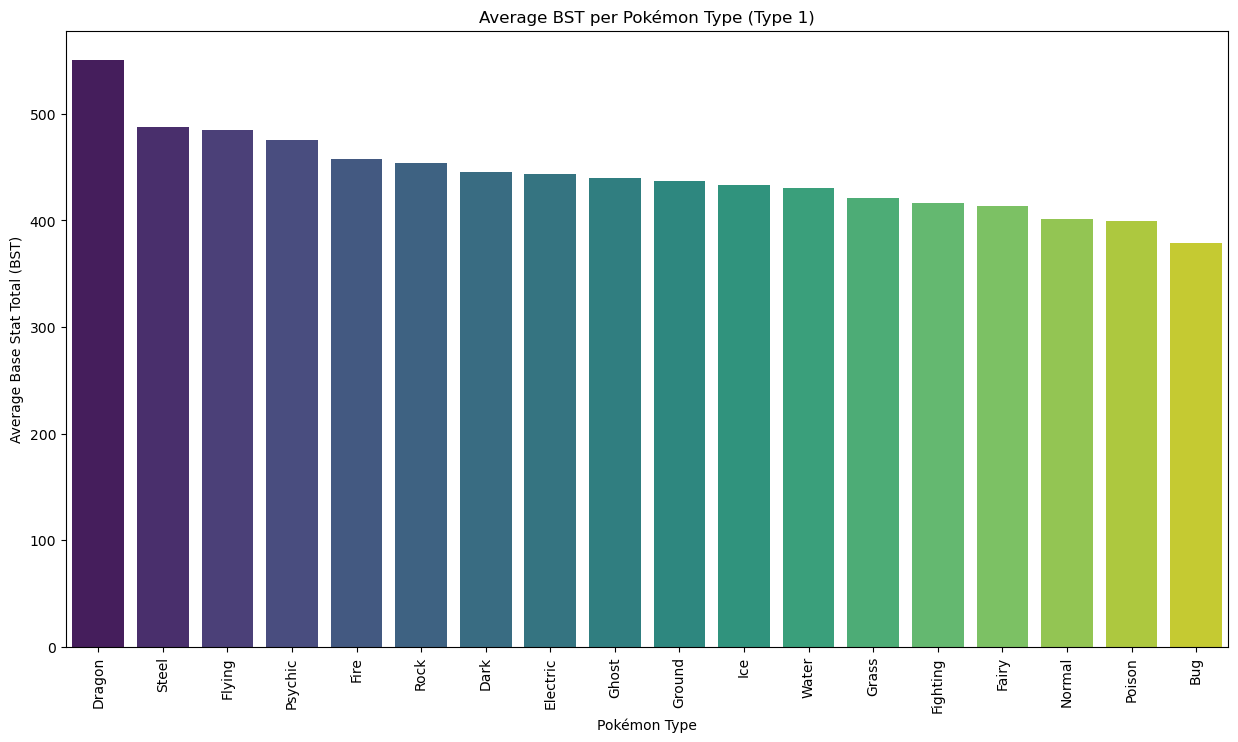

In [51]:
# Just using Type 1

avg_bst_per_type = df.groupby('Type 1')['BST'].mean().sort_values(ascending=False)


plt.figure(figsize=(15, 8))
sns.barplot(x=avg_bst_per_type.index, y=avg_bst_per_type.values, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.title('Average BST per Pokémon Type (Type 1)')
plt.xlabel('Pokémon Type')
plt.ylabel('Average Base Stat Total (BST)')


plt.show()

## 5. String Filterings and Aggregations

- [x] **Remove all Mega Pokémon from the dataframe**

In [333]:
df = pd.read_csv("clean_pokemon_data.csv")

df.loc[df["Name"].str.contains('Mega')]  # Shows every row with Mega in the name

df.drop(df[df["Name"].str.contains("Mega", na=False)].index, inplace=True)  # deletes all rows with 'Mega' in them

df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
794,718,Zygarde (50% Form),Dragon,Ground,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
797,720,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- [x] **Select all Pokemon names that start with a 'Pi' and are Flying type, put them in a list**

In [164]:
import re

df = pd.read_csv("clean_pokemon_data.csv")

Pi_fly = df.loc[(df["Name"].str.match(r"^Pi[A-Z]", flags=re.I)) &  ((df["Type 1"] == "Flying") | (df["Type 2"] == "Flying")),  "Name"]

Pi_fly_names = Pi_fly.tolist()

Pi_fly_names

['Pidgey',
 'Pidgeotto',
 'Pidgeot',
 'PidgeotMega Pidgeot',
 'PinsirMega Pinsir',
 'Pidove']

- [x] **Change names in Type 1 (Fire->Lava) and Type 2 (Psychic->Light) columns**

In [95]:

# normal syntax:

# df[["Type 1", "Type 2"]] = df[["Type 1", "Type 2"]].replace("Fire", "Lava")

# if you have a lot of columns but still want to be specific:

df.iloc[:,2:4].replace("Fire", "Lava") 

df.iloc[:,2:4].replace("Psychic","Light")

#  switches everywhere in the df:

# df = df.applymap(lambda x: "Lava" if x == "Fire" else x)   


df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST,Cluster,Stats Sum,Stats Std
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,0,318,8.640988
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,0,405,8.902247
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,2,525,8.902247
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,2,625,18.747592
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,0,309,8.995369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600,2,600,40.824829
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700,2,700,37.267800
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600,2,600,32.659863
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680,2,680,42.295258


## 6. NumPy Manipulation  

- [x] **Convert Pokémon stats into NumPy arrays**  

In [16]:
stats_np = df.iloc[:,4:10].to_numpy()   # turn the columns and rows to an array (matrix) shape

stats_sum = np.sum(stats_np, axis=1)   # sum the stats, creating another version of the BST column

df['Stats Sum'] = stats_sum

stats_std = np.std(stats_np, axis=1)
df['Stats Std'] = stats_std             # This should be the same as the Balance column, but that isn't working

df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST,Stats Sum,Stats Std
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,318,8.640988
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,405,8.902247
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,525,8.902247
3,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,625,18.747592
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,309,8.995369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600,600,40.824829
796,719,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700,700,37.267800
797,720,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600,600,32.659863
798,720,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680,680,42.295258


- [x] **Compute average BST** 

In [364]:
import numpy as np

df = pd.read_csv("clean_pokemon_data.csv")

df["BST"]= df.iloc[:,4:10].sum(axis=1)

df.head(15)

stats_np = df.iloc[:,4:10].to_numpy() 

means = np.mean(stats_np, axis=0)  # Mean for each column (stat)

BST_mean = np.sum(means)  # Sum of all stat means (sums all of the values in the vector 'means')

BST_mean

435.1025000000001

- [x] **Sort Pokémon by Attack, Defense, or Speed** 

In [368]:
# Convert the relevant stats to NumPy array

attack_np = df["Attack"].to_numpy()
defense_np = df["Defense"].to_numpy()
speed_np = df["Speed"].to_numpy()

sorted_attack = np.sort(attack_np)
sorted_defense = np.sort(defense_np)
sorted_speed = np.sort(speed_np)

print(sorted_attack)  

# The disadvantage here is that it only keeps the values of the stats, so sort_values() from pandas is better for this

[  5   5  10  10  10  15  20  20  20  20  20  20  20  20  22  23  24  25
  25  25  25  25  25  25  27  29  30  30  30  30  30  30  30  30  30  30
  30  30  30  30  30  30  30  30  30  30  33  35  35  35  35  35  35  35
  35  35  35  35  35  35  36  38  38  38  40  40  40  40  40  40  40  40
  40  40  40  40  40  40  40  40  40  40  40  40  40  41  41  42  43  44
  45  45  45  45  45  45  45  45  45  45  45  45  45  45  45  45  45  45
  45  45  45  45  45  45  45  45  45  46  47  47  47  48  48  48  48  48
  48  48  48  48  49  49  49  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50  50
  50  50  50  50  50  50  50  50  51  51  52  52  52  52  52  52  52  53
  53  53  53  53  54  55  55  55  55  55  55  55  55  55  55  55  55  55
  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  55  56
  56  56  57  57  58  58  58  58  59  59  59  60  60  60  60  60  60  60
  60  60  60  60  60  60  60  60  60  60  60  60  6

- [x] **Find top 10 highest BST Pokémon**

In [374]:
df["BST"] = df.iloc[:, 4:10].sum(axis=1)  

bst_np = df["BST"].to_numpy()

top_10_indices = np.argsort(bst_np)[-10:][::-1]  # Reverse to get highest first


top_10_pokemon = df.iloc[top_10_indices]    # Display top 10 Pokémon
print(top_10_pokemon[["Name", "BST"]]) 

                        Name  BST
163      MewtwoMega Mewtwo X  780
426    RayquazaMega Rayquaza  780
164      MewtwoMega Mewtwo Y  780
422      KyogrePrimal Kyogre  770
424    GroudonPrimal Groudon  770
552                   Arceus  720
712       KyuremWhite Kyurem  700
494    GarchompMega Garchomp  700
409  SalamenceMega Salamence  700
413  MetagrossMega Metagross  700


# Data Science

## 7. Inferential Statistics

- [x] **Correlation Matrix (Heatmap) for the stats**  

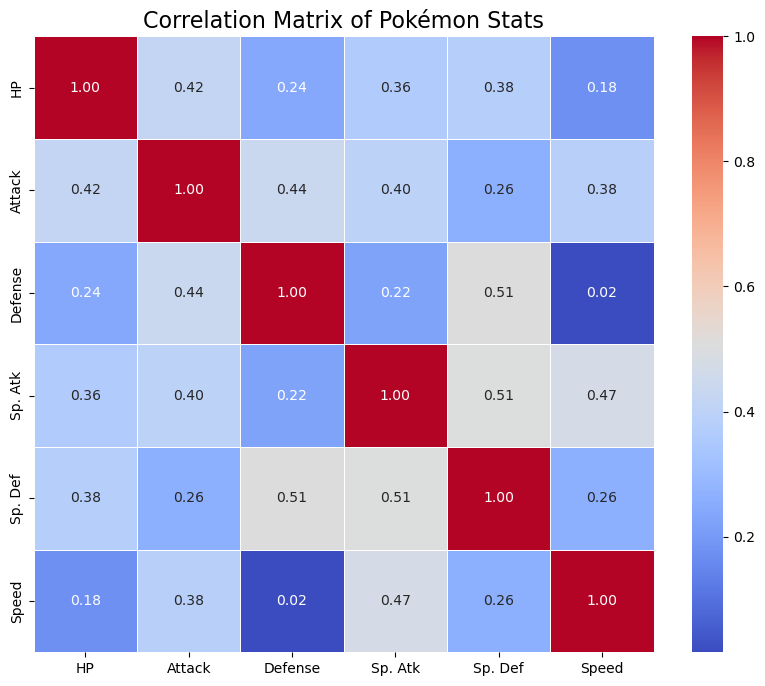

In [54]:
df = pd.read_csv("clean_pokemon_data")

corr_matrix = df.iloc[:,4:10].corr()  

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Pokémon Stats', fontsize=16)
plt.show()

- [x] **Top 3 correlations**

In [97]:
corr_matrix = df.iloc[:,4:10].corr()


corr_matrix = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape), k=0).astype(bool))  # Remove the diagonal by setting them to NaN

top_3_correlations = corr_matrix.unstack().sort_values(ascending=False).head(3)

print(top_3_correlations)

# Sp. Def and Defense seem to go hand in hand in how they grow

Sp. Def  Defense    0.510747
         Sp. Atk    0.506121
Speed    Sp. Atk    0.473018
dtype: float64


- [x] **Top 3 correlations by Generation**

In [311]:
# Do a correlation matrix for each generation

top_correlations_by_gen = {}

for gen, subset in df.groupby("Generation"):
    corr_matrix = subset.iloc[:,4:10].corr()

    # Remove diagonal (self-correlations)
    corr_matrix = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape), k=0).astype(bool))

    top_3_corr = corr_matrix.unstack().sort_values(ascending=False).head(3)

    top_correlations_by_gen[gen] = top_3_corr

top_3_correlations_df = pd.DataFrame(top_correlations_by_gen) # Convert dictionary to DataFrame

top_3_correlations_df

ValueError: could not convert string to float: 'Poison'

- [x] **Principal Component Analysis (PCA)** to visualize Pokémon clustering.  

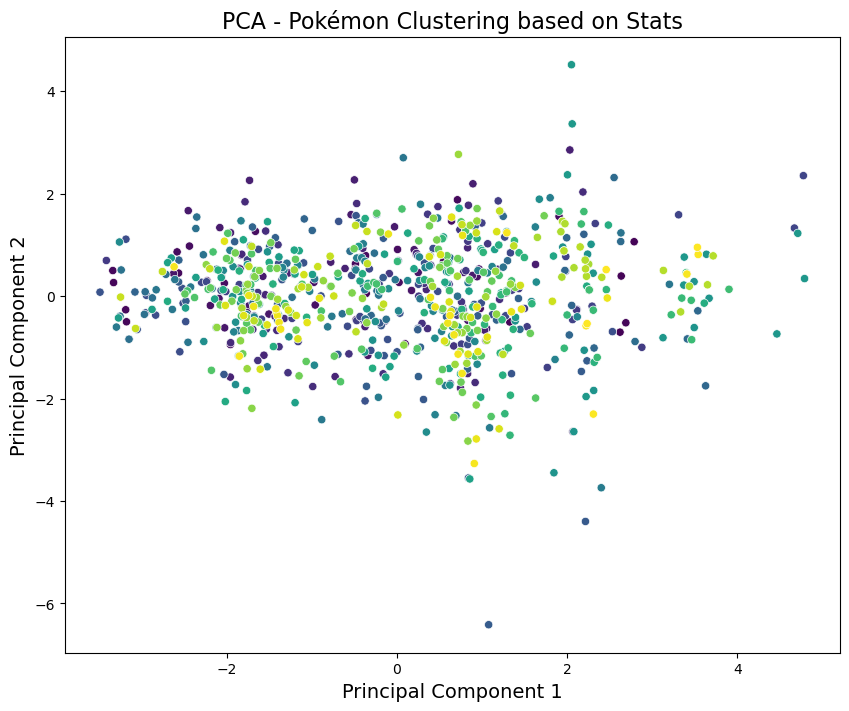

In [394]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']        # or: df.iloc[:,4:10]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[X])


pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])


pca_df['Pokemon'] = df['Name']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, hue='Pokemon', palette='viridis', legend=None)
plt.title('PCA - Pokémon Clustering based on Stats', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)


plt.show()

- [x] **Relationship between Speed and BST** (does higher BST mean higher Speed?).

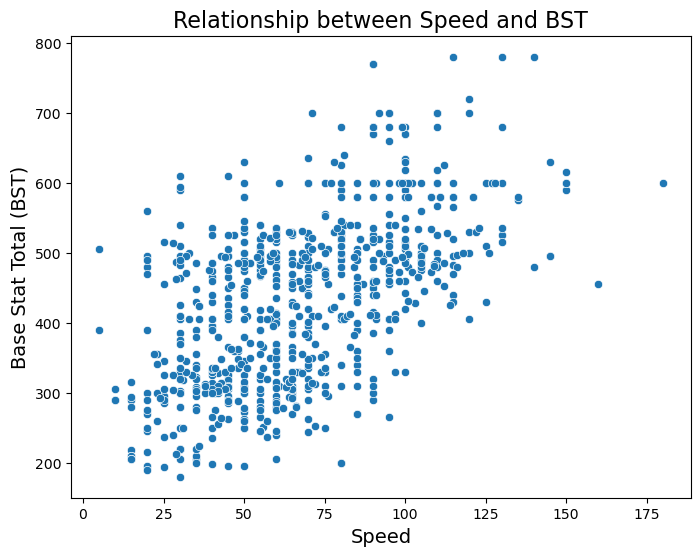

Correlation coefficient between Speed and BST: 0.58


In [62]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Speed', y='BST', data=df)

plt.title('Relationship between Speed and BST', fontsize=16)
plt.xlabel('Speed', fontsize=14)
plt.ylabel('Base Stat Total (BST)', fontsize=14)


plt.show()

correlation = df[['Speed', 'BST']].corr().iloc[0, 1]

print(f"Correlation coefficient between Speed and BST: {correlation:.2f}")

- [x] **K-Means Clustering** Group Pokémon based on stats.  

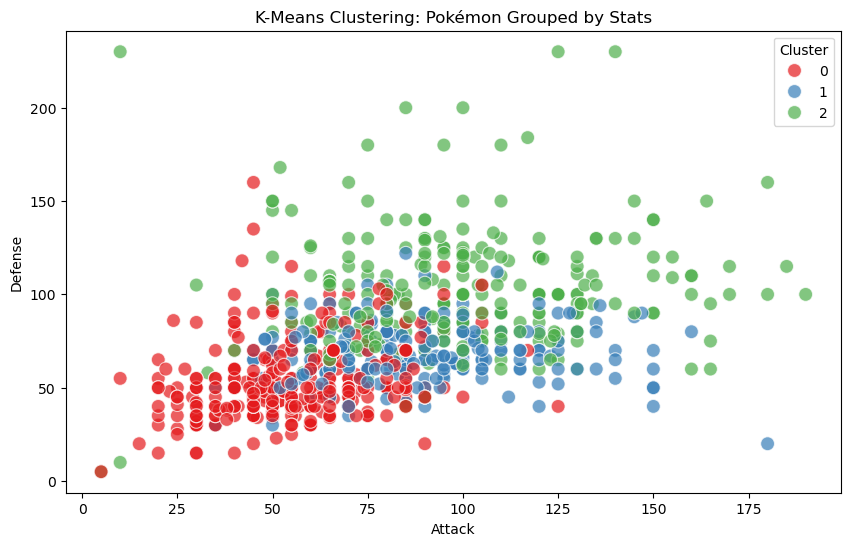

In [64]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


stats = df.iloc[:,4:10]

scaler = StandardScaler()
scaled_stats = scaler.fit_transform(stats)

kmeans = KMeans(n_clusters=3, random_state=42)

df['Cluster'] = kmeans.fit_predict(scaled_stats)

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Attack', y='Defense', hue='Cluster', palette='Set1', data=df, s=100, alpha=0.7)

plt.title('K-Means Clustering: Pokémon Grouped by Stats')
plt.xlabel('Attack')
plt.ylabel('Defense')

plt.show()


## 8. Further Analysis  
  

- [x] **Find the most balanced Pokemon** (Balanced stats as in not much disparity between any two stats).  

In [337]:
# This is the perfect application of the standard deviation

import math as ma

df = pd.read_csv("clean_pokemon_data.csv")   # Notice that the cleaning we did before doesn't apply since we are reading the original csv file again

# Create the BST column again

df["BST"] = df.iloc[:, 4:10].sum(axis=1)

def sd(df):
    list_1 =[]
    stats = df.iloc[:,4:10]                       # iloc for specific positions, like matrix entries, loc is better for columns with conditions
    mean_stat = stats.mean(axis=1)
    for index, row in stats.iterrows():
        sqdif = [(x_i - mean_stat[index])**2 for x_i in row]
        v = sum(sqdif)/(len(row)-1)  # sample mean
        std = ma.sqrt(v)
        list_1.append(std)
    df["Balance"]= list_1
    return df

df_sd = sd(df)

df_sd.sort_values(by="Balance", ascending = True)

top_10_balance = df_sd.loc[(df["Balance"] == 0)].sort_values(by="BST", ascending = False).head(10)

top_10_balance




,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST,Balance
552,493,Arceus,Normal,NaN,120,120,120,120,120,120,4,True,720,0.0
165,151,Mew,Psychic,NaN,100,100,100,100,100,100,1,False,600,0.0
271,251,Celebi,Psychic,Grass,100,100,100,100,100,100,2,False,600,0.0
427,385,Jirachi,Steel,Psychic,100,100,100,100,100,100,3,True,600,0.0
548,490,Manaphy,Water,NaN,100,100,100,100,100,100,4,False,600,0.0
550,492,ShayminLand Forme,Grass,NaN,100,100,100,100,100,100,4,True,600,0.0
553,494,Victini,Psychic,Fire,100,100,100,100,100,100,5,True,600,0.0
396,362,Glalie,Ice,NaN,80,80,80,80,80,80,3,False,480,0.0
547,489,Phione,Water,NaN,80,80,80,80,80,80,4,False,480,0.0
383,351,Castform,Normal,NaN,70,70,70,70,70,70,3,False,420,0.0


- [x] **Reset the old indices and save this dataframe**

In [ ]:
top_10_balance.reset_index(drop=True , inplace=True)  # resetting old indicies

top_10_balance.to_csv('Top_10_balance.csv')   # saving this new dataframe

- [x] **Speed vs Defense tradeoff analysis**.  

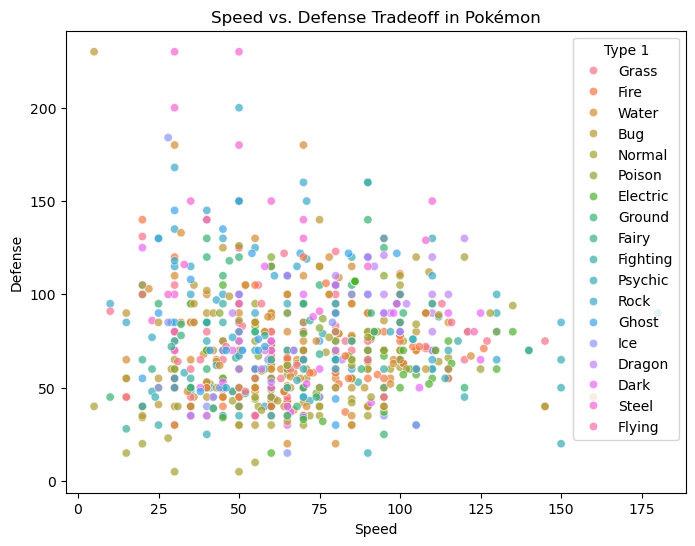

In [68]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Speed", y="Defense", hue="Type 1", alpha=0.7)
plt.title("Speed vs. Defense Tradeoff in Pokémon")
plt.xlabel("Speed")
plt.ylabel("Defense")
plt.show()

# The faster you are, the less defense you seem to have

- [] **Best BST Team per Pokedex # range** (e.g., 1-50, 2-10, 300-567, etc.) Remember, you can only have one mega, no duplicates (e.g. Mewtwo and Mega Mewtwo Y), and only one Pokémon form per team (e.g. Heat Rotom and Mow Rotom). 

In [262]:
# df = pd.read_csv("clean_pokemon_data.csv")

# df = df.drop(columns=["Unnamed 0"])

df["BST"] = df.iloc[:,5:11].sum(axis=1)  # Summing HP, Attack, Defense, etc. for this new df that has an extra column

all_types = set(df["Type 1"].unique())

all_entries = set(df["#"].unique())   # all_entries = sorted(df["#"].unique())   this one is now a list, maybe this one works better

leg_status = set(df["Legendary"].unique())


Best_per_entry = {}

for u_type in all_types:
    for leg in leg_status:
        for start in all_entries:
            for finish in all_entries:
                top_entries = df.loc[((df["Type 1"] == u_type) | (df["Type 2"] == u_type))
                & (df["Legendary"] == leg) & (df["#"] >= start) & (df["#"] <= finish)].sort_values(by="BST", ascending=False).head(6)
                Best_per_entry[(u_type,leg,start,finish)] = top_entries

Best_per_entry["Fire",False,15,25]

# Figure this one out

KeyboardInterrupt: 

- [x] **This one is a specific example but it works. The only issue now is trying to implement it in the above for loops (or do it some other way)**

In [75]:
import re

# df.drop(columns="Unnamed: 0")
df = pd.read_csv("clean_pokemon_data.csv")  

df["BST"] = df.iloc[:,5:11].sum(axis=1) 

 

def base_name(Name):
    return re.sub(r"Normal|Attack|Mega|Defense|Speed|Altered|Origin|Incarnate|Primal|Mode|Heat|Wash|Frost|Fan|Mow|Zen|Standard|Therian|Primal|Ash|Ordinary|Resolute|Aria|Pirouette|Blade|Shield|50%|Form|Land|Sky|(|)|Complete|10%|Black|White|Confined|Unbound","",Name).strip()

# We don't need Mega here since we're applying this to a non-megas dataframe, but just for generalization I'll keep it there

# This gives you the best mega for 50-500: (out of various megas)

mega_entries = df.loc[((df["Type 1"] == "Fire") | (df["Type 2"] == "Fire"))
& (df["Legendary"] == False) & (df["#"] >= 50) & (df["#"] <= 500) & (df["Name"].str.contains("Mega")) ].sort_values(by="BST", ascending=False).head(1)


mega_entries["Base name"] = mega_entries["Name"].apply(base_name)

the_one= mega_entries.iloc[0,-1]   # search for the name that we must use to exclude from non_mega_entries


non_mega_entries = df.loc[((df["Type 1"] == "Fire") | (df["Type 2"] == "Fire"))
& (df["Legendary"] == False) & (df["#"] >= 50) & (df["#"] <= 500) 
& (~df["Name"].str.contains("Mega"))
& (~df["Name"].str.contains(the_one)) ].sort_values(by="BST", ascending=False)


non_mega_entries["Base name"] = non_mega_entries["Name"].apply(base_name)

non_mega_entries = non_mega_entries.loc[~non_mega_entries.duplicated(subset="Base name", keep="first")]

non_mega_entries = non_mega_entries.head(5).drop(columns=["Base name"])

Total = pd.concat([mega_entries, non_mega_entries]).sort_values(by="BST", ascending = False).drop(columns=["Base name","Unnamed: 0"])

Total




,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
279,257,Mega Blaziken,Fire,Fighting,80,160,80,130,80,100,3,False,630
64,59,Arcanine,Fire,NaN,90,110,80,100,80,95,1,False,555
518,467,Magmortar,Fire,NaN,75,95,67,125,95,83,4,False,540
171,157,Typhlosion,Fire,NaN,78,84,78,109,85,100,2,False,534
437,392,Infernape,Fire,Fighting,76,104,71,104,71,108,4,False,534
559,500,Emboar,Fire,Fighting,110,123,65,100,65,65,5,False,528


## 9. Neural Networks

- [x] **Check how many pokemon have different type combinations**

In [147]:
df.groupby(['Type 1','Type 2']).count()  # counts how many type combinations there are

#  Name  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
Type 1 Type 2                                                             
Bug    Electric   2     2   2       2        2        2        2      2   
       Fighting   2     2   2       2        2        2        2      2   
       Fire       2     2   2       2        2        2        2      2   
       Flying    14    14  14      14       14       14       14     14   
       Ghost      1     1   1       1        1        1        1      1   
...              ..   ...  ..     ...      ...      ...      ...    ...   
Water  Ice        3     3   3       3        3        3        3      3   
       Poison     3     3   3       3        3        3        3      3   
       Psychic    5     5   5       5        5        5        5      5   
       Rock       4     4   4       4        4        4        4      4   
       Steel      1     1   1       1        1        1        1      1   

                 Generation  Legendary  
Type 1 Type 2                           
Bug    Electric           2          2  
       Fighting           2          2  
       Fire               2          2  
       Flying            14         14  
       Ghost              1          1  
...                     ...        ...  
Water  Ice                3          3  
       Poison             3          3  
       Psychic            5          5  
       Rock               4          4  
       Steel              1          1  

[136 rows x 10 columns]

- [x] **Create a function that returns all of the second types, and their occurrences, for a given first type**

In [156]:
all_types = set(df["Type 1"].unique())  

Type_comb = {}  

for u_type in all_types:
    type_counts = df[df["Type 1"] == u_type]["Type 2"].value_counts()
    Type_comb[u_type] = type_counts  

print(Type_comb["Fire"])

Type 2
Fighting    7
Flying      6
Ground      3
Psychic     2
Normal      2
Dragon      1
Rock        1
Steel       1
Water       1
Name: count, dtype: int64


- [] **Find all of the type combinations that don't exist**

In [198]:
# Perhaps make a cartesian product of types (removing double equal types), and subtract from the type combinations that exist in the df

# combinations that exist in the dataframe
def comb_in_df(df):
    type_combinations = {}
    for u_type in all_types:
         type_combinations[u_type] = df[df["Type 1"] == u_type]["Type 2"].dropna().unique().tolist()
    return type_combinations

comb_in_df(df)

# Cartesian product (all possible type combinations)

# Subtract one from the other

{'Steel': ['Ground',
  'Flying',
  'Fairy',
  'Rock',
  'Psychic',
  'Dragon',
  'Fighting',
  'Ghost'],
 'Grass': ['Poison',
  'Psychic',
  'Flying',
  'Dragon',
  'Dark',
  'Fighting',
  'Ground',
  'Ice',
  'Fairy',
  'Steel'],
 'Ice': ['Psychic', 'Flying', 'Ground', 'Water', 'Ghost'],
 'Flying': ['Dragon'],
 'Poison': ['Ground', 'Flying', 'Dark', 'Bug', 'Fighting', 'Water', 'Dragon'],
 'Psychic': ['Fairy', 'Fighting', 'Flying', 'Grass', 'Fire', 'Ghost', 'Dark'],
 'Dragon': ['Flying', 'Fairy', 'Psychic', 'Ground', 'Fire', 'Electric', 'Ice'],
 'Dark': ['Flying',
  'Ice',
  'Fire',
  'Ghost',
  'Fighting',
  'Steel',
  'Dragon',
  'Psychic'],
 'Ghost': ['Poison', 'Flying', 'Dark', 'Dragon', 'Fire', 'Grass'],
 'Rock': ['Ground',
  'Water',
  'Flying',
  'Dark',
  'Psychic',
  'Grass',
  'Bug',
  'Steel',
  'Fighting',
  'Dragon',
  'Ice',
  'Fairy'],
 'Ground': ['Rock',
  'Flying',
  'Dragon',
  'Psychic',
  'Fire',
  'Steel',
  'Dark',
  'Electric',
  'Ghost'],
 'Fire': ['Flying',
  '

- [] **Create a Neural Network that predicts what these new Pokemon's average BST would be, with these new type combinations, based on the average BST found for each type (take the average of the average BSTs for both types)**

In [ ]:
# watch:  https://www.youtube.com/watch?v=kft1AJ9WVDk

# Find the average BST for one type and then the other, and take the average of those two



- [] **Create a Neural Network that predicts what the 100 BST allocation will be for these new mega evolutions (assuming the Pokemon maintain their types): Bastiodon, Rampardos, Scizor, Breloom, Wormadam (one for each form), Mothim, Masquerain, Vespiqueen, and Floatzel**

In [93]:
# First we must check the patterns that happen in mega evolutions (asunder from the 100-point BST increase)

import re

mega_candidates

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,BST
0,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
46,3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
1,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False,534
47,6,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634
48,6,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,475,Mega Gallade,Psychic,Fighting,68,165,95,65,115,110,4,False,618
44,531,Audino,Normal,NaN,103,60,86,60,86,50,5,False,445
93,531,Mega Audino,Normal,Fairy,103,60,126,80,126,50,5,False,545
45,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600


In [108]:
# Notice the patterns that happen per mega evolution (by type). Ask chatgpt and learn on youtube

import numpy as np

venusaur_stats = combined_df_2.iloc[0, 4:10].to_numpy()

mega_venusaur_stats = combined_df_2.iloc[1, 4:10].to_numpy()

row_data = mega_venusaur_stats - venusaur_stats

row_data

array([0, 18, 40, 22, 20, 0], dtype=object)

## 10. Make this dataframe usable on MySQL Server

- [x] **The original file**

In [360]:
# For the columns to be callable, they need to either have only one word or words separated by "_" and not a space, and not have "." in them
# This here is one approach to renaming two columns (we still have to deal with the Sp. Atk and Sp. Def columns)

df= pd.read_csv("pokemon_data.csv")

df["Type_1"] = df["Type 1"]
df["Type_2"] = df["Type 2"]
 
df.drop("Type 1", axis=1, inplace=True)
df.drop("Type 2", axis=1, inplace=True)

new_order = list(df.columns[:2]) + [df.columns[-2]] + [df.columns[-1]] + list(df.columns[2:10])


df= df[new_order]

# df.to_csv("SQL_pokemon_data.csv")


# Another solution is: df.rename(columns={"Type 1": "Type_1", "Type 2": "Type_2"}, inplace=True)

# The most general solution is: df.columns = [col.replace(" ", "_") for col in df.columns]   for cases where you have a lot of columns

# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work

In [53]:
# Change everything:

df= pd.read_csv("pokemon_data.csv")

df.rename(columns={"Type 1": "Type_1", "Type 2": "Type_2", "Sp. Atk": "Sp_Atk", "Sp. Def" : "Sp_Def"}, inplace=True)

df

df.to_csv("SQL_pokemon_data.csv")

- [x] **The clean file**

In [49]:
df= pd.read_csv("clean_pokemon_data.csv")


df.rename(columns={"Type 1": "Type_1", "Type 2": "Type_2", "Sp. Atk": "Sp_Atk", "Sp. Def" : "Sp_Def"}, inplace=True)

df = df.drop(columns=["Unnamed: 0"])

# In case you need a new order, be careful if two columns are similar they really mess up the data

# new_order = list(df.columns[:2]) + [df.columns[-4]] + [df.columns[-3]] + [df.columns[-1]] + list(df.columns[2:10])

# df= df[new_order]

df

df.to_csv("SQL_clean_pokemon_data.csv")

# Another solution is: df.rename(columns={"Type 1": "Type_1", "Type 2": "Type_2"}, inplace=True)

# The most general solution is: df.columns = [col.replace(" ", "_") for col in df.columns]   for cases where you have a lot of columns

# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work